In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [9]:
data = pd.read_csv("synthetic_transactions.csv")
data.fillna(0, inplace=True)

# Encode categorical variables
# Example: Encoding 'customer_gender' (you can repeat this for other categorical columns as needed)
label_encoder = LabelEncoder()
data['customer_gender'] = label_encoder.fit_transform(data['customer_gender'])  # Convert 'M' and 'F' to 0 and 1

# If there are other categorical columns, apply similar encoding or one-hot encoding
# For instance: transaction_category
data = pd.get_dummies(data, columns=['transaction_category'], drop_first=True)  # One-hot encode 'transaction_category'

# Define feature columns and target
X = data.drop(columns=["fraud"])  # Features
y = data["fraud"]  # Target

# Split dataset into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for models that require scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-Nearest Neighbors
print("Training K-Nearest Neighbors...")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_preds = knn.predict(X_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, knn_preds))
print(classification_report(y_test, knn_preds))

# Random Forest
print("\nTraining Random Forest...")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

# Lasso Regression (as a binary classifier using logistic regression with L1 penalty)
print("\nTraining Lasso Regression...")
lasso = LogisticRegression(penalty="l1", solver="liblinear", random_state=42)
lasso.fit(X_train_scaled, y_train)
lasso_preds = lasso.predict(X_test_scaled)
print("Lasso Regression Accuracy:", accuracy_score(y_test, lasso_preds))
print(classification_report(y_test, lasso_preds))

# Two-Layer Multi-Layer Perceptron
print("\nTraining Multi-Layer Perceptron...")
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=200, random_state=42)
mlp.fit(X_train_scaled, y_train)
mlp_preds = mlp.predict(X_test_scaled)
print("MLP Accuracy:", accuracy_score(y_test, mlp_preds))
print(classification_report(y_test, mlp_preds))

Training K-Nearest Neighbors...
KNN Accuracy: 0.9255
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1859
           1       0.10      0.01      0.01       141

    accuracy                           0.93      2000
   macro avg       0.51      0.50      0.49      2000
weighted avg       0.87      0.93      0.89      2000


Training Random Forest...
Random Forest Accuracy: 0.9295
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1859
           1       0.00      0.00      0.00       141

    accuracy                           0.93      2000
   macro avg       0.46      0.50      0.48      2000
weighted avg       0.86      0.93      0.90      2000


Training Lasso Regression...
Lasso Regression Accuracy: 0.9295
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1859
           1       0.00      0.00      0.00       141

    acc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

MLP Accuracy: 0.8915
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1859
           1       0.10      0.07      0.08       141

    accuracy                           0.89      2000
   macro avg       0.52      0.51      0.51      2000
weighted avg       0.87      0.89      0.88      2000



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


Cross-Validation Scores: [0.9295 0.9295 0.928  0.929  0.929 ]
Mean Accuracy: 0.929
Standard Deviation: 0.0005477225575051464


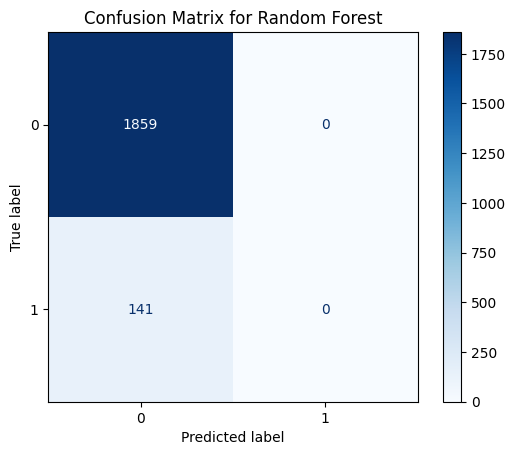

In [11]:
# Import necessary libraries for evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
rf_preds = rf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, rf_preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest")
plt.show()


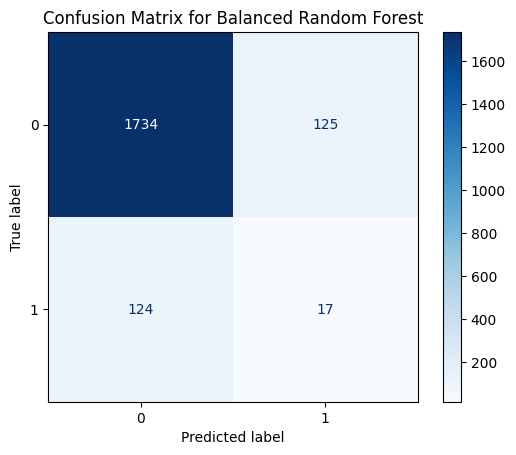

In [12]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train_balanced)

# Predict on the test set
rf_preds = rf.predict(X_test_scaled)

# Generate the confusion matrix
cm = confusion_matrix(y_test, rf_preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Balanced Random Forest")
plt.show()


In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Load the dataset (replace 'your_dataset.csv' with your dataset file name)
data = pd.read_csv("synthetic_transactions.csv")  # Replace with the actual file name or path

# Encode categorical variables
data['customer_gender'] = data['customer_gender'].map({'M': 0, 'F': 1})  # Gender encoding
data = pd.get_dummies(data, columns=['transaction_category'], drop_first=True)  # One-hot encoding for categories

# Define features and target variable
X = data.drop(columns=["fraud"])  # Drop the target column from features
y = data["fraud"]  # Target column

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train_balanced)

# Predict on the test set
rf_preds = rf.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, rf_preds)
print("Random Forest Model Accuracy:", accuracy)

# Display a classification report for more detailed evaluation
print("\nClassification Report:\n", classification_report(y_test, rf_preds))


Random Forest Model Accuracy: 0.885

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1859
           1       0.20      0.21      0.21       141

    accuracy                           0.89      2000
   macro avg       0.57      0.57      0.57      2000
weighted avg       0.89      0.89      0.89      2000

